<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/ANN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load your stock index data into a pandas DataFrame
# Replace 'your_data.csv' with your data file or source
data = pd.read_csv('gila_river.csv')

# Assuming your dataset contains features and the target variable
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended for MLPs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000, random_state=42)

# Train the MLP
mlp.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate Mean Squared Error (MSE) for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print MSE for training and testing data
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

Training MSE: 4481.634320270009
Testing MSE: 10337.217115604199


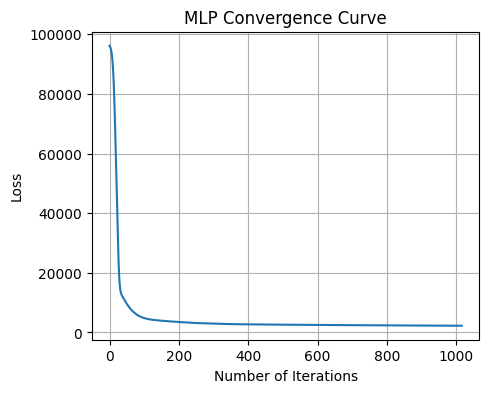

In [19]:
# Visualize the convergence curve (loss curve)
plt.figure(figsize=(5, 4))
plt.plot(mlp.loss_curve_)
plt.title('MLP Convergence Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

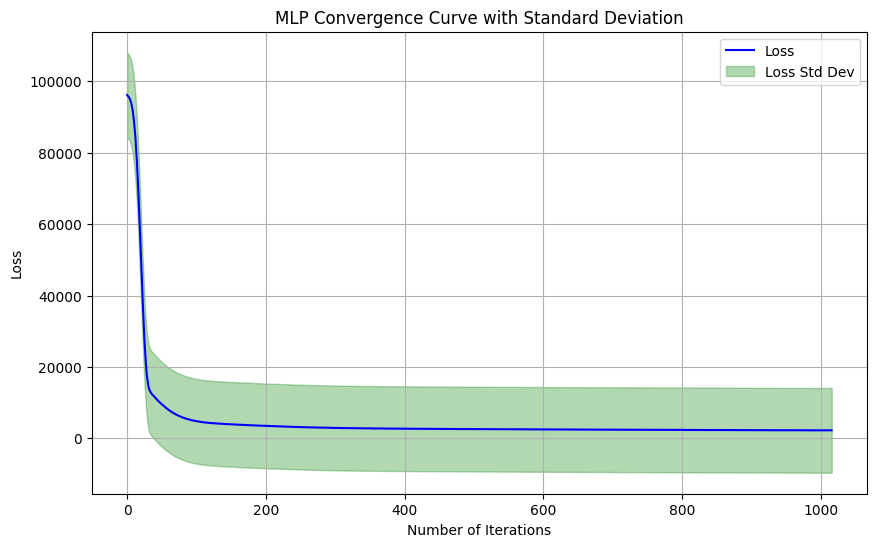

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the standard deviation of the loss values
loss_std = np.std(mlp.loss_curve_)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the convergence curve (loss curve)
plt.plot(mlp.loss_curve_, label='Loss', color='b')

# Fill the area around the loss curve with standard deviation
plt.fill_between(range(len(mlp.loss_curve_)),
                 mlp.loss_curve_ - loss_std,
                 mlp.loss_curve_ + loss_std,
                 color='g', alpha=0.3, label='Loss Std Dev')

plt.title('MLP Convergence Curve with Standard Deviation')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


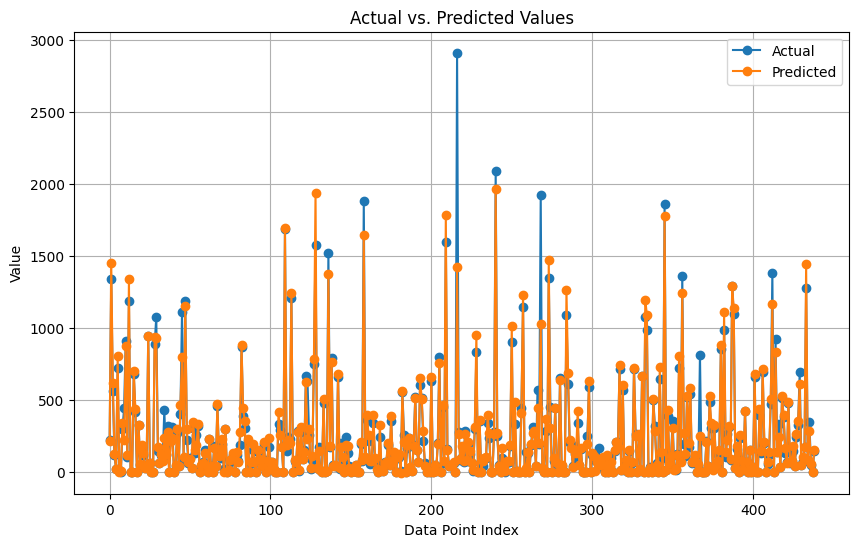

In [20]:
import matplotlib.pyplot as plt

# Create a range of indices for the data points
indices = range(len(y_test))

# Plot the actual vs. predicted values as a line plot
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', linestyle='-', marker='o')
plt.plot(indices, y_test_pred, label='Predicted', linestyle='-', marker='o')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


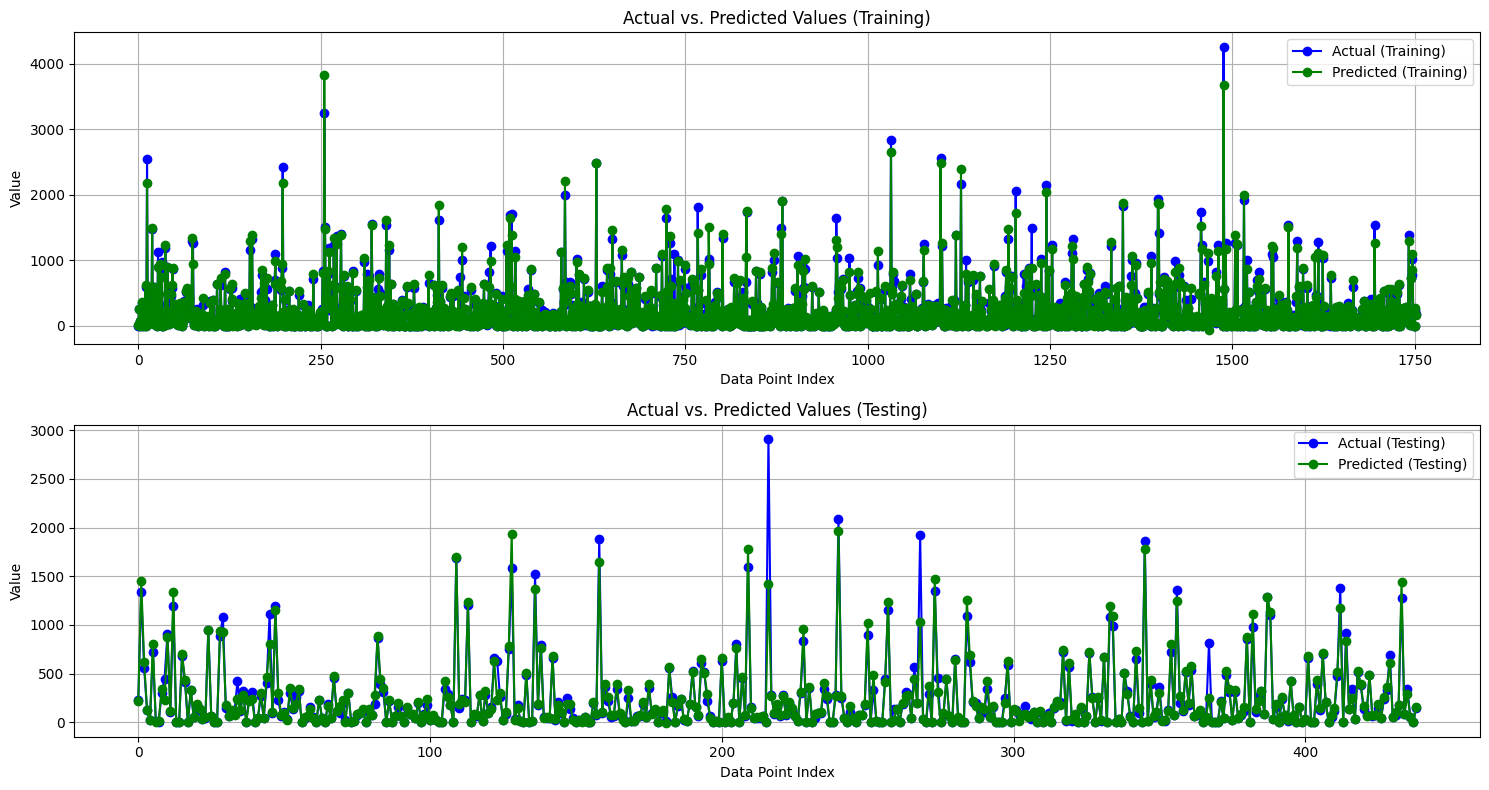

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of indices for the data points
indices_train = range(len(y_train))
indices_test = range(len(y_test))

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plot the actual vs. predicted values for training data
axes[0].plot(indices_train, y_train, label='Actual (Training)', linestyle='-', marker='o', color='b')
axes[0].plot(indices_train, y_train_pred, label='Predicted (Training)', linestyle='-', marker='o', color='g')
axes[0].set_title('Actual vs. Predicted Values (Training)')
axes[0].set_xlabel('Data Point Index')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True)

# Plot the actual vs. predicted values for testing data
axes[1].plot(indices_test, y_test, label='Actual (Testing)', linestyle='-', marker='o', color='b')
axes[1].plot(indices_test, y_test_pred, label='Predicted (Testing)', linestyle='-', marker='o', color='g')
axes[1].set_title('Actual vs. Predicted Values (Testing)')
axes[1].set_xlabel('Data Point Index')
axes[1].set_ylabel('Value')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the subplots
plt.show()
